In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
data=pd.read_csv("D:\\logistic regresation\\covid_19_clean_complete.csv")

In [43]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0


In [44]:
#active cases calacaltion

data['Active']=data['Confirmed']-data['Deaths']-data['Recovered']

In [45]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0,0.0


In [46]:
#change colom names change

data.rename(columns={'Province/State':'State',
                    'Country/Region':'Country'},inplace=True)


In [47]:
data.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0,0.0


In [48]:
#calcaltion deaths country vise
print(data[['Deaths']].max())

print(data[['Country','Deaths']].value_counts())


Deaths    5476.0
dtype: float64
Country    Deaths
US         0.0       3335
China      0.0        789
Canada     0.0        713
France     0.0        520
Australia  0.0        515
                     ... 
Iraq       11.0         1
           9.0          1
           8.0          1
           4.0          1
Brazil     15.0         1
Length: 733, dtype: int64


In [50]:
data[['Country','Active','Deaths','Recovered']].sort_values(by='Deaths',inplace=False).max()

Country      Zimbabwe
Active        50633.0
Deaths         5476.0
Recovered     59879.0
dtype: object

In [59]:
data[['Country','Active','Deaths','Recovered']].sort_values(by='Active').max()

Country      Zimbabwe
Active        50633.0
Deaths         5476.0
Recovered     59879.0
dtype: object

In [73]:
data[['Country','Deaths']].sort_values(by='Deaths').max()

Country    Zimbabwe
Deaths       5476.0
dtype: object

In [78]:
data.groupby('Country').Deaths.sum().sort_values(ascending=False)

Country
China         119412.0
Italy          39435.0
Iran           14809.0
Spain           9117.0
France          3533.0
                ...   
Ethiopia           0.0
Montenegro         0.0
Mongolia           0.0
Monaco             0.0
Zimbabwe           0.0
Name: Deaths, Length: 183, dtype: float64

In [68]:
data[['Country']].value_counts()

Country   
US            3596
China         2046
Canada         744
Australia      558
France         558
              ... 
Greece          62
Greenland       62
Grenada         62
Guadeloupe      62
Zimbabwe        62
Length: 183, dtype: int64

<AxesSubplot:xlabel='Date'>

<Figure size 1440x1440 with 0 Axes>

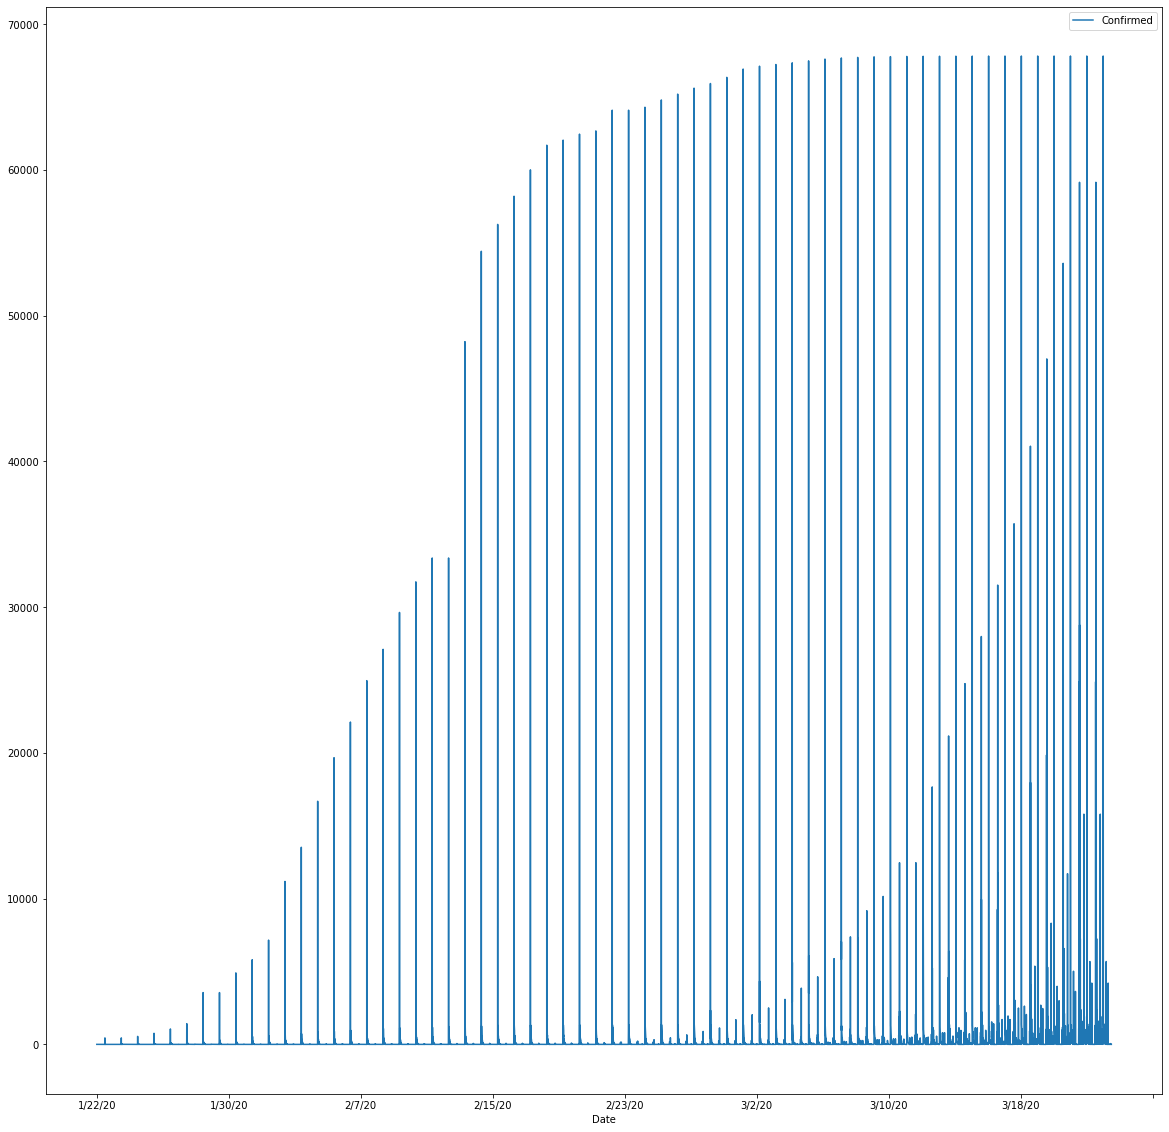

In [94]:
#creating lin plot using conformed
plt.figure(figsize=(20,20))
data.plot(x='Date',y='Confirmed',figsize=(20,20))

In [84]:
data[['Country','Date']].value_counts()

Country   Date   
US        2/3/20     58
          2/15/20    58
          2/28/20    58
          2/26/20    58
          2/25/20    58
                     ..
Germany   2/2/20      1
          2/20/20     1
          2/21/20     1
          2/22/20     1
Zimbabwe  3/9/20      1
Length: 11346, dtype: int64

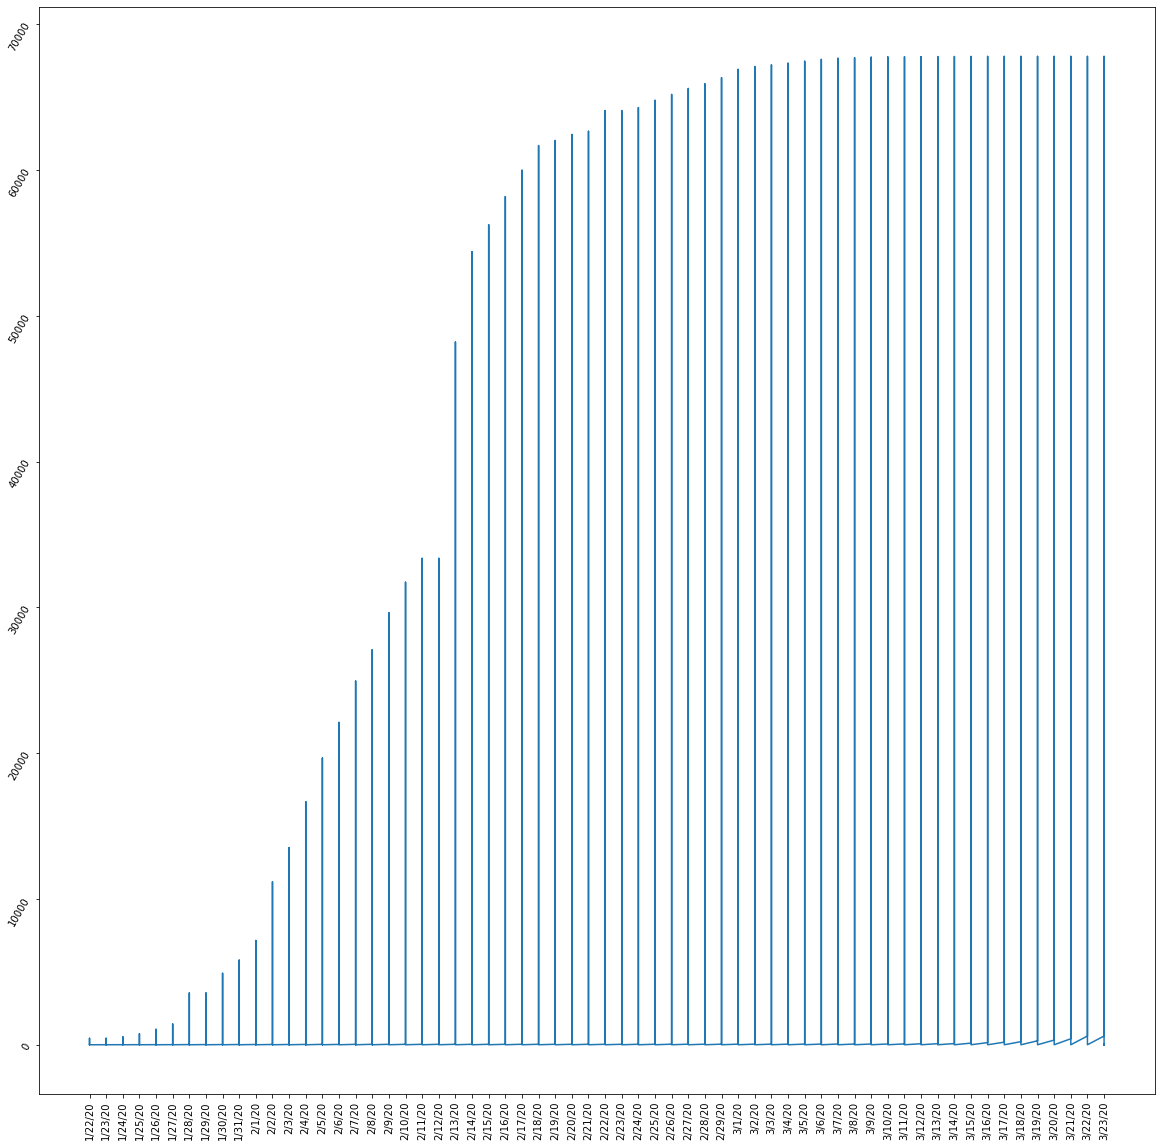

In [92]:
plt.figure(figsize=(20,20))
plt.plot(data['Date'],data['Confirmed'])
plt.xticks(rotation=90)
plt.yticks(rotation=60)
plt.show()

C:\Users\phani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


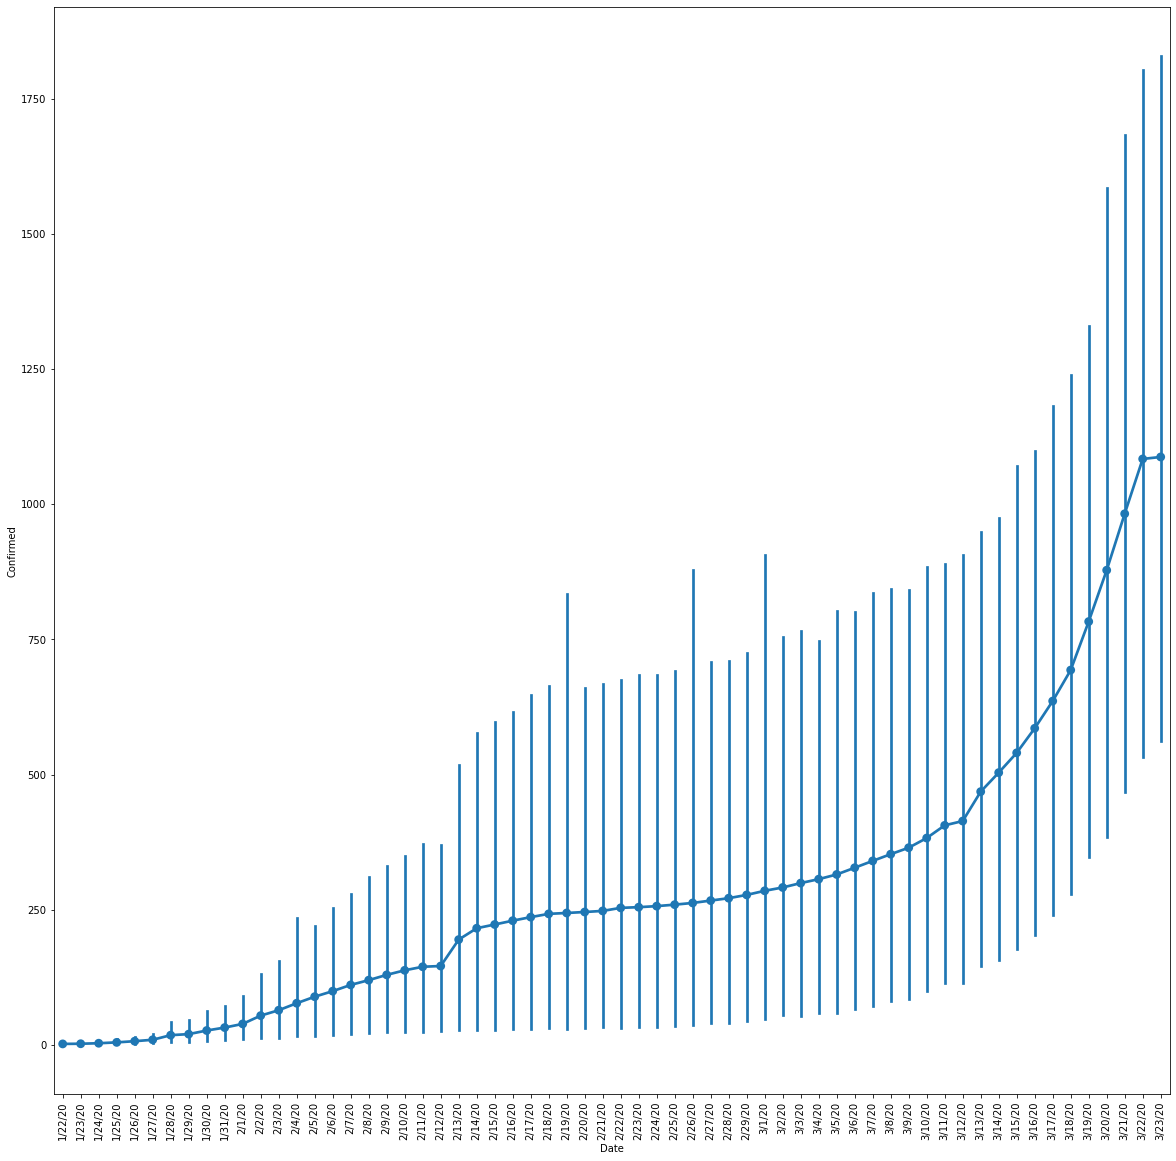

In [87]:
#point plot 

import seaborn as sns

plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.pointplot(data['Date'],data['Confirmed'])
plt.show()


In [142]:
#cheak most country most active cases


Country    Zimbabwe
Active      50633.0
0              2836
dtype: object

In [123]:
top=data.groupby('Country')['Active'].sum().sort_values(ascending=False).head(20).reset_index()

In [124]:
top

,Country,Active
0,China,1624545.0
1,Italy,407570.0
2,Spain,162715.0
3,South Korea,162275.0
4,Germany,158657.0
5,Iran,158032.0
6,US,154229.0
7,France,110216.0
8,Switzerland,45549.0
9,United Kingdom,33175.0


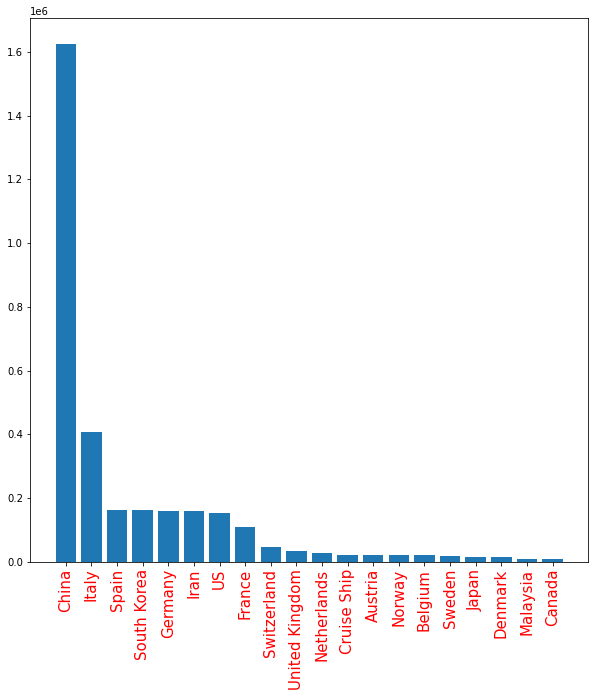

In [133]:
plt.figure(figsize=(10,10))
plt.bar(top['Country'],top['Active'])
plt.xticks(rotation=90,fontsize=15,color='red')
plt.show()

C:\Users\phani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\phani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

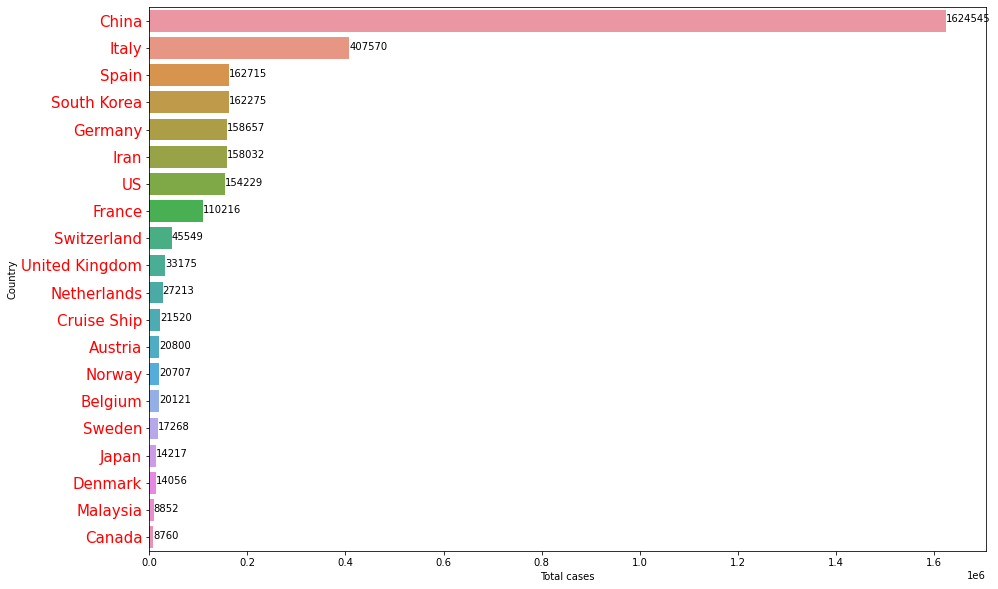

In [158]:
plt.figure(figsize=(15,10))
sns.barplot(top['Active'],top['Country'])
plt.yticks(rotation=360,fontsize=15,color='red')

ax=sns.barplot(top.Active,top.Country)
for i,(value,name) in enumerate(zip(top['Active'],top['Country'])):
    ax.text(value,i-.05,f'{value:.0f}',size=10,ha='left',va='center')
ax.set(xlabel='Total cases',ylabel='Country')